In [257]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
from collections import Counter
from urlextract import URLExtract
from wordcloud import WordCloud
from urllib.parse import urlparse



In [258]:
f = open("fg.txt",'r',encoding='utf-8')

In [259]:
data = f.read()

In [260]:
# print(data)

In [273]:
# Regular expression pattern
pattern = r'(\d+/\d+/\d+, \d+:\d+\s*[ap]m) - ([^:]+): (.*)'

# Find matches in the chat data
matches = re.findall(pattern, data)

# Create lists to store extracted data
timestamps, senders, messages = [], [], []

# Iterate through matches and extract data
for match in matches:
    timestamps.append(match[0])
    senders.append(match[1])
    messages.append(match[2])

# Create a DataFrame from the lists
df = pd.DataFrame({"timestamp": timestamps, "sender": senders, "message": messages})

# Convert timestamp column to datetime
df["timestamp"] = pd.to_datetime(df['timestamp'], format="%d/%m/%Y, %I:%M %p") 

# Display the DataFrame
df.tail()

,timestamp,sender,message
39810,2024-01-17 10:44:00,Mujeeb khan,@917774952797
39811,2024-01-17 10:44:00,Sanu 2.🙂,Pata he usko ......vo he😂
39812,2024-01-17 10:50:00,Mujeeb khan,Kamse kam vo roz roz ye toh nhi bolta ye karna...
39813,2024-01-17 11:05:00,Harshad,<Media omitted>
39814,2024-01-17 11:40:00,Sanu 2.🙂,Right


## Nummber of messages by each member of the group

In [262]:
# Create sender counts as a series
sender_count_series = df["sender"].value_counts()
sender_count_series

Wini 😂         9842
Mujeeb khan    9038
Sanu 2.🙂       8428
Pravin Kale    4572
Harshad        4114
Model          3821
Name: sender, dtype: int64

<Axes: >

c:\ProgramData\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128514 (\N{FACE WITH TEARS OF JOY}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128578 (\N{SLIGHTLY SMILING FACE}) missing from current font.
  func(*args, **kwargs)
c:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128514 (\N{FACE WITH TEARS OF JOY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128578 (\N{SLIGHTLY SMILING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


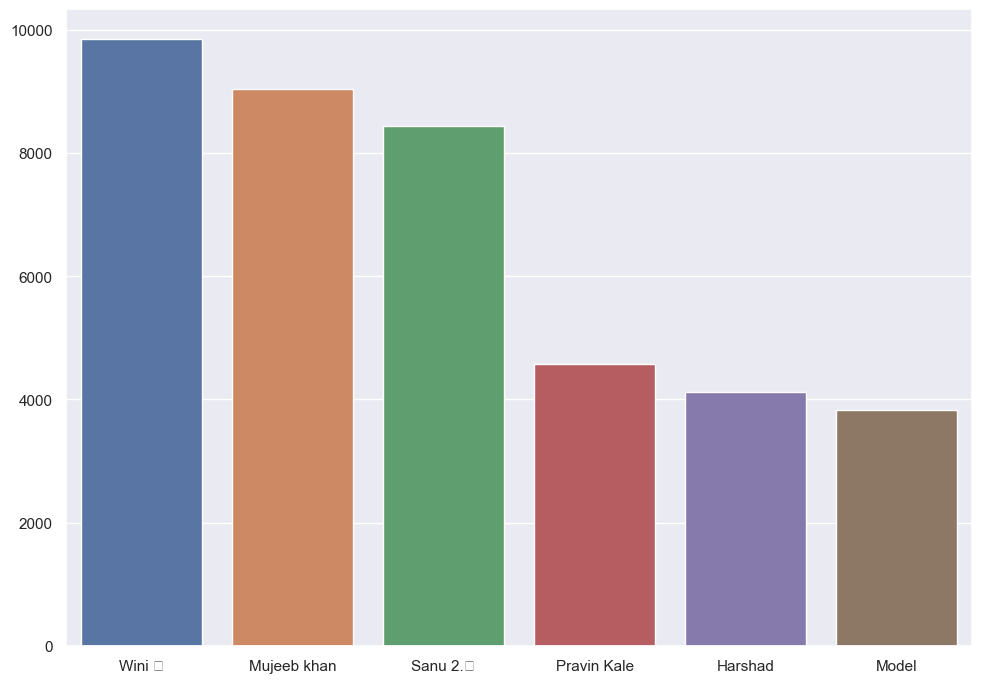

In [263]:
sns.barplot(x=sender_count_series.index, y=sender_count_series.values)

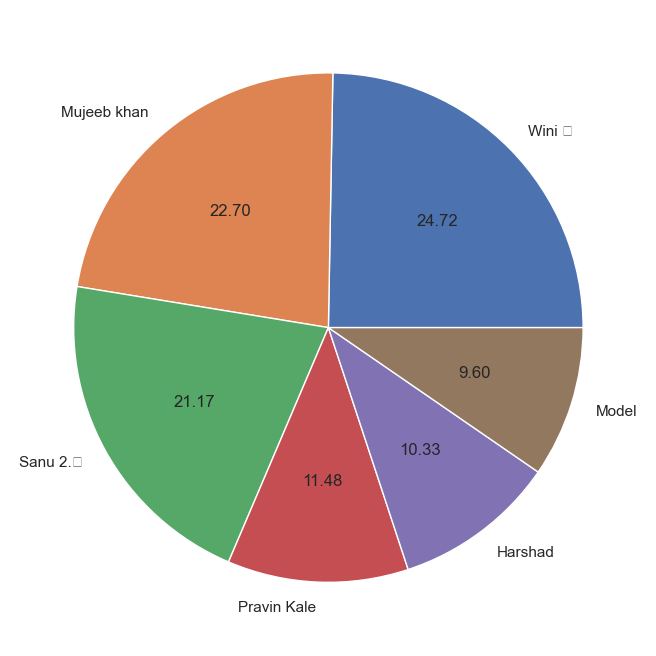

In [264]:
plt.pie(sender_count_series.values, labels= sender_count_series.index, autopct = "%0.2f")
plt.show()

## Most Used emoji

In [265]:
emojis = []
users = sender_count_series.index

for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [266]:
a = pd.DataFrame(Counter(emojis).most_common(170)) 

In [267]:
a

,0,1
0,😂,10794
1,🙄,1919
2,🙂,1391
3,🔥,1165
4,🥲,1161
...,...,...
165,👊,4
166,🔵,4
167,🤐,4
168,💘,4


In [268]:


# Assuming df is your DataFrame with columns: 'user', 'message'
emojis_by_user = {}

for index, row in df.iterrows():
    sender = row['sender']
    message = row['message']

    emojis = [c for c in message if c in emoji.EMOJI_DATA]

    if sender not in emojis_by_user:
        emojis_by_user[sender] = emojis
    else:
        emojis_by_user[sender].extend(emojis)


user_to_analyze = 'Sanu 2.🙂'
user_emojis = emojis_by_user.get(user_to_analyze, [])

# Get the most common emojis used by the user
most_common_emojis = Counter(user_emojis).most_common(10)  # Change 10 to any desired number

# Display the result
print(f"Most common emojis used by {user_to_analyze}:")
most_common_emojis


Most common emojis used by Sanu 2.🙂:


[('😂', 2885),
 ('🙄', 1370),
 ('🙂', 1150),
 ('🥺', 627),
 ('🔥', 444),
 ('🥲', 402),
 ('😶', 301),
 ('🥳', 295),
 ('😑', 288),
 ('🤧', 236)]

,Domain
0,meet.google.com
1,collegecirculars.unipune.ac.in
2,youtu.be
3,youtu.be
4,drive.google.com


In [269]:
extractor = URLExtract()

links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

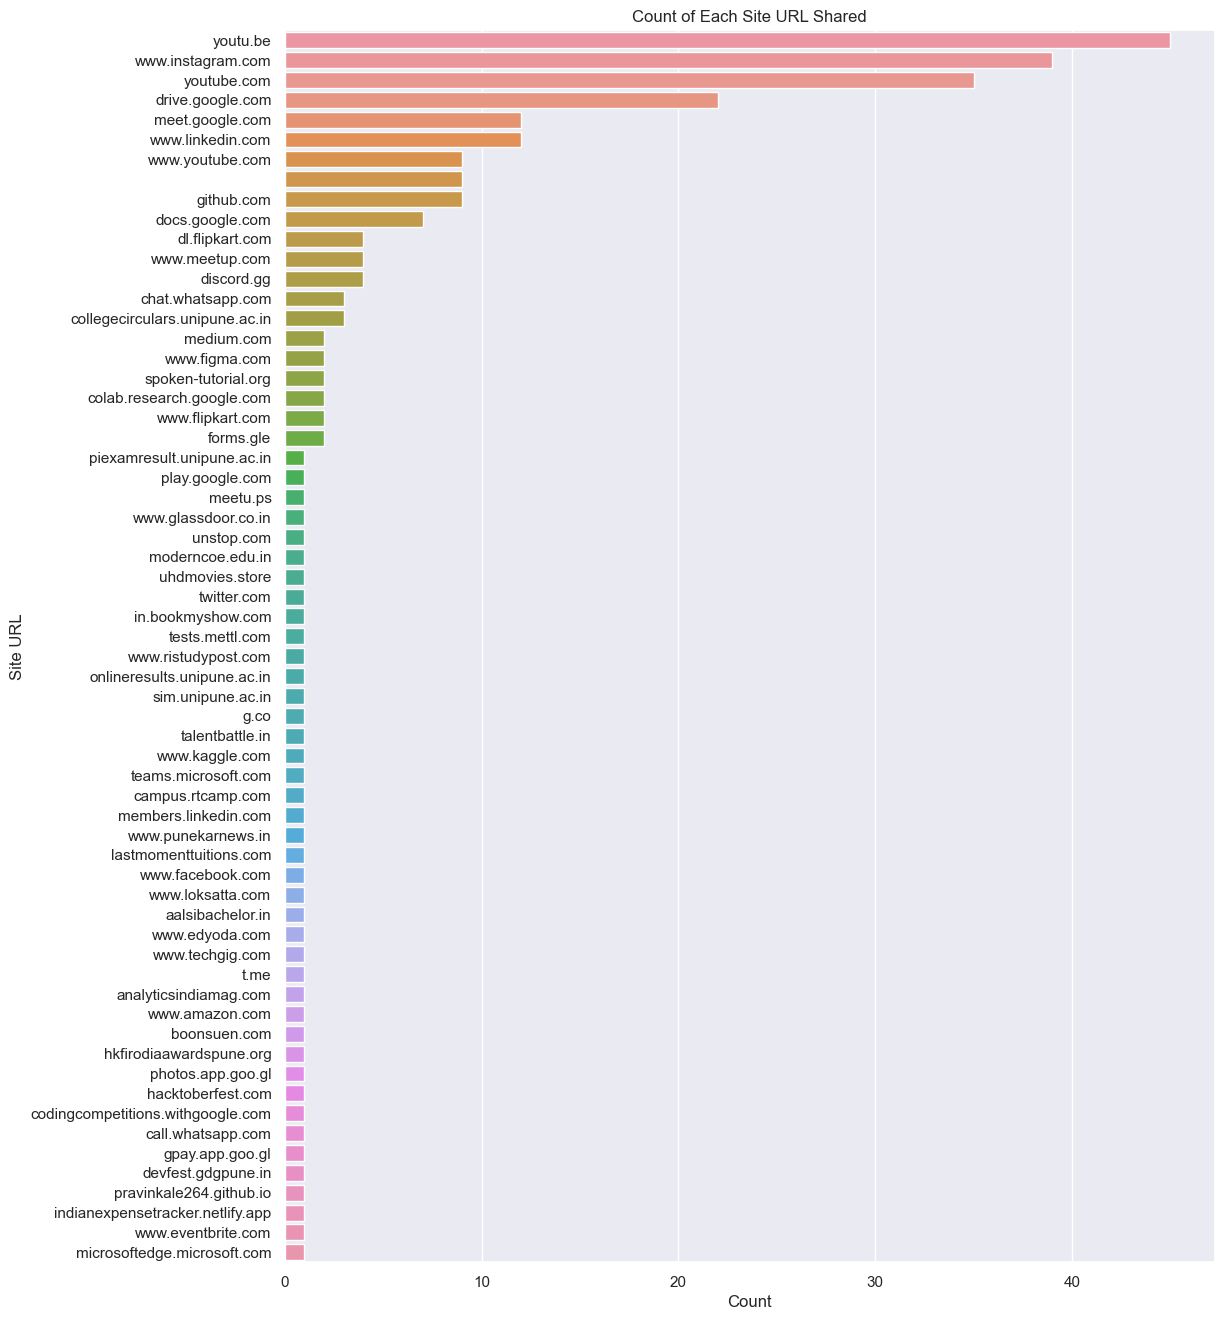

In [270]:
parsed_urls = [urlparse(url) for url in links]
domains = [parsed_url.netloc for parsed_url in parsed_urls]

# Create a DataFrame
df = pd.DataFrame({'Domain': domains})

# Create a countplot
plt.figure(figsize=(12, 16))
sns.countplot(y='Domain', data=df, order=df['Domain'].value_counts().index)
plt.title('Count of Each Site URL Shared')
plt.xlabel('Count')
plt.ylabel('Site URL')
plt.show()

# Making more columns like year, months,days,hours,minutes

In [274]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month_name()
df['day'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df.head()

,timestamp,sender,message,year,month,day,hour,minute
0,2022-06-04 08:09:00,Wini 😂,Me tr 3:44 la uthun doodh pila,2022,June,Saturday,8,9
1,2022-06-04 08:09:00,Wini 😂,Bhook lagli hoti madhya ratri,2022,June,Saturday,8,9
2,2022-06-04 09:57:00,Wini 😂,.,2022,June,Saturday,9,57
3,2022-06-04 09:59:00,Mujeeb khan,.,2022,June,Saturday,9,59
4,2022-06-04 10:07:00,Pravin Kale,.,2022,June,Saturday,10,7


# Finding the month name in which users are more active

In [ ]:
monthData = df['month'].value_counts()
monthData

June         8315
July         6070
November     5903
October      3874
September    3836
August       3659
January      2622
December     2138
February     1030
March         825
May           773
April         770
Name: month, dtype: int64

<Axes: >

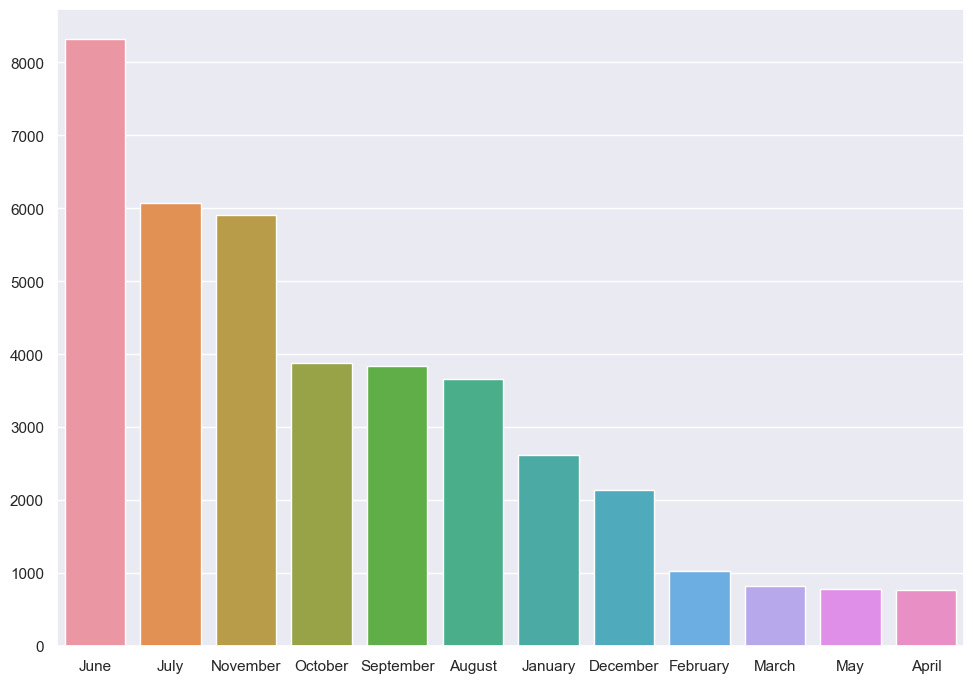

In [ ]:
sns.barplot(x=monthData.index, y=monthData.values)
# 

# Finding the Week name in which users are more active

In [ ]:
weekData = df['day'].value_counts()
weekData

Tuesday      6744
Monday       6529
Wednesday    6020
Saturday     5558
Sunday       5261
Friday       5203
Thursday     4500
Name: day, dtype: int64

<Axes: >

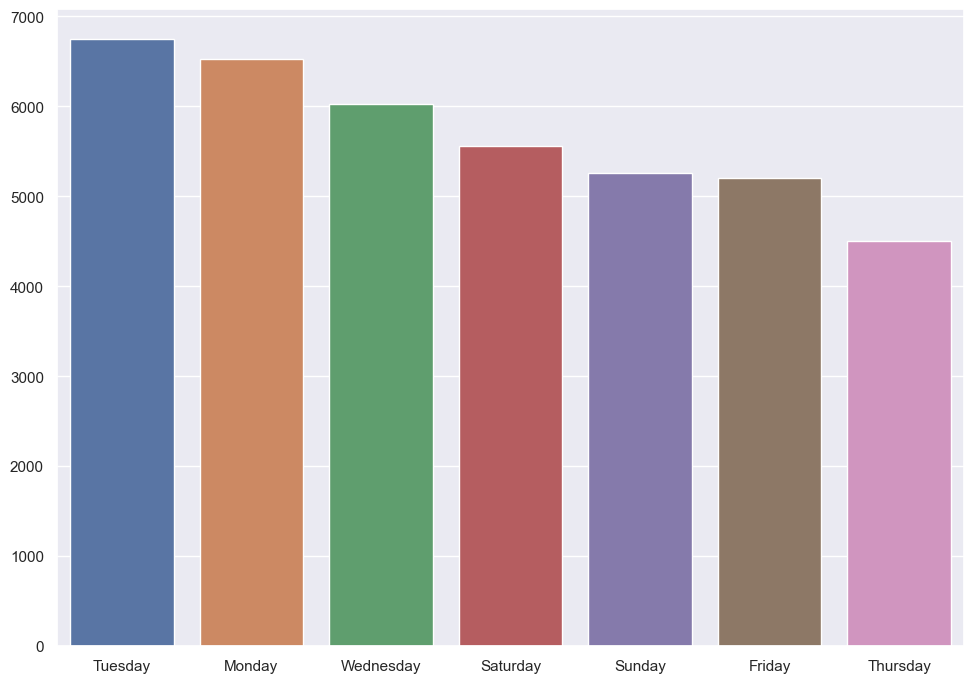

In [ ]:
sns.barplot(x=weekData.index, y=weekData.values)


# Yearwise Timeline

year  month    
2022  August       2476
      December     1615
      July         4837
      June         7300
      November     4118
      October      2129
      September    2233
2023  April         770
      August       1183
      December      523
      February     1030
      January      2078
      July         1233
      June         1015
      March         825
      May           773
      November     1785
      October      1745
      September    1603
2024  January       544
Name: message, dtype: int64


<Axes: xlabel='year', ylabel='count'>

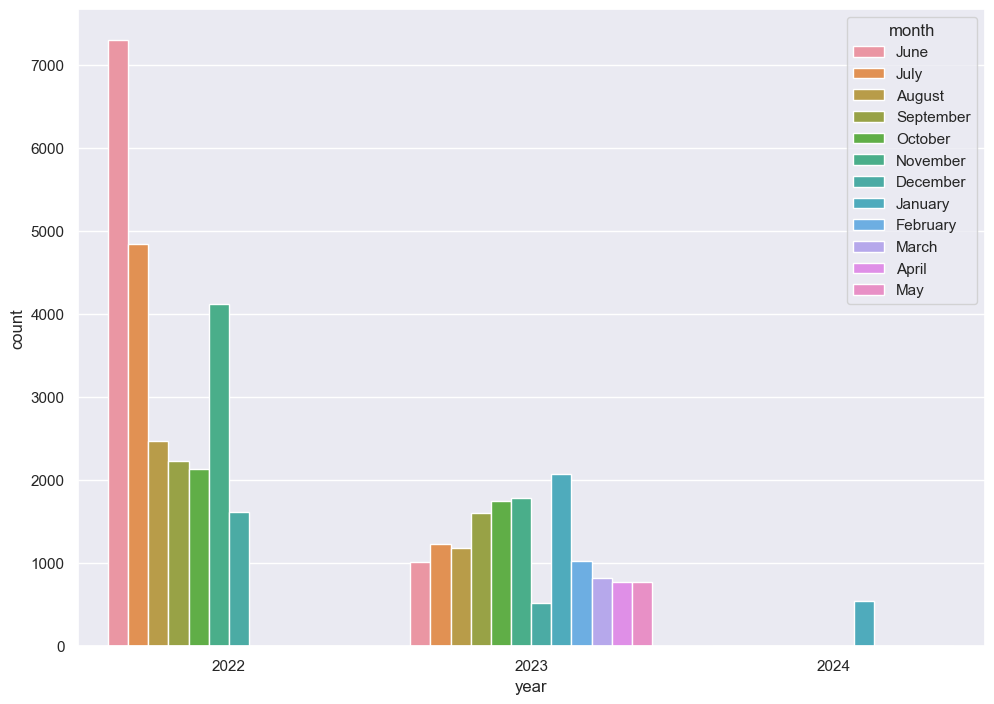

In [ ]:
timeline = df.groupby(['year','month']).count()['message']
print(timeline)
sns.countplot(x='year', hue='month', data=df)

# Now Finding those words which repeatly more and more time

In [ ]:
temp = df[df['sender'] != 'group notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [ ]:
f = open('stop_hinglish.txt')
stop_words = f.read()
print("stop words\n",stop_words)

stop words
 .
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
come

In [ ]:
words = ""
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words += word + ' '



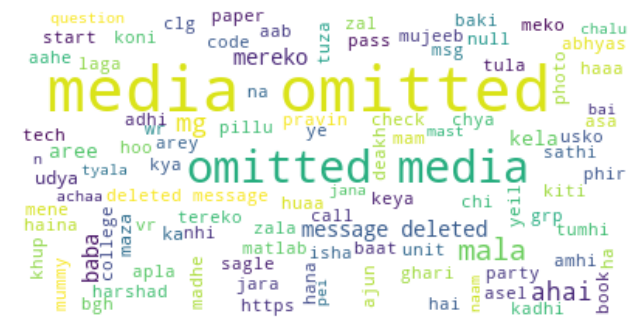

In [ ]:

wordcloud = WordCloud(max_words=100, background_color="white").generate(words)

# Display the word cloud using Matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()